In [7]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [11]:
df = pd.read_csv('C:/Users/Sys/Downloads/Dataset/iris.csv')

In [ ]:
E

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Function to load the dataset
def load_dataset():
    try:
        for dirname, _, filenames in os.walk('/kaggle/input'):
            for filename in filenames:
                path = os.path.join(dirname, filename)
                return pd.read_csv(path)
    except Exception as e:
        print(f"An error occurred while loading the dataset: {e}")
        return None

def preprocess_data(df):
    try:
        if df.duplicated().any() or df.isnull().any().any():
            df = df.drop_duplicates().dropna()
        
        labels = df['species']
        features = df.drop('species', axis=1)
        features = pd.get_dummies(features, columns=features.select_dtypes(include=['object']).columns)
        
        return features, labels
    except Exception as e:
        print(f"An error occurred during data preprocessing: {e}")
        return None, None
def plot_correlation_matrix(dataframe):
    try:
        # Selecting only numeric columns
        numeric_df = dataframe.select_dtypes(include=['float64', 'int64'])

        # Calculating the correlation matrix
        corr_matrix = numeric_df.corr()

        # Creating a heatmap using Seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Heatmap')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred while plotting the correlation matrix heatmap: {e}")

In [19]:
# Function to train Decision Tree model
from sklearn.model_selection import train_test_split

# Function to train Decision Tree model
def train_decision_tree_model(features, labels):
    try:
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=4)
        
        # Your model training code goes here
        
        # Example: Decision Tree model
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        
        # Example: Model evaluation
        accuracy = model.score(X_test, y_test)
        print(f'Model Accuracy: {accuracy}')

    except Exception as e:
        print(f"An error occurred during decision tree model training: {e}")

# Example usage:
# features, labels = preprocess_data(your_dataframe)
# train_decision_tree_model(features, labels)

In [21]:
# Function to train Decision Tree model
def train_decision_tree_model(features, labels):
    try:
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
        dt_model = DecisionTreeClassifier(random_state=42)
        dt_model.fit(X_train, y_train)
        return dt_model, X_test, y_test
    except Exception as e:
        print(f"Error occurred during training Decision Tree model: {e}")
        return None, None, None

In [22]:
def train_logistic_regression_model(features, labels):
    try:
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
        logreg_model = LogisticRegression(max_iter=1000, random_state=42)
        logreg_model.fit(X_train, y_train)
        return logreg_model, X_test, y_test
    except Exception as e:
        print(f"Error occurred during training Logistic Regression model: {e}")
        return None, None, None

In [23]:
# Function to compare models using classification report
def compare_models_classification_report(model1, model2, X_test_dt, y_test_dt, X_test_logreg, y_test_logreg):
    try:
        print("Decision Tree Model:")
        y_pred_dt = model1.predict(X_test_dt)
        print(classification_report(y_test_dt, y_pred_dt))

        print("\nLogistic Regression Model:")
        y_pred_logreg = model2.predict(X_test_logreg)
        print(classification_report(y_test_logreg, y_pred_logreg))
    except Exception as e:
        print(f"Error occurred during model comparison: {e}")

In [24]:
def plot_confusion_matrix(model, X_test, y_test):
    try:
        # Predict the labels
        y_pred = model.predict(X_test)

        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plotting confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()
    except Exception as e:
        print(f"An error occurred while plotting the confusion matrix: {e}")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Shape of dataframe: (150, 5)


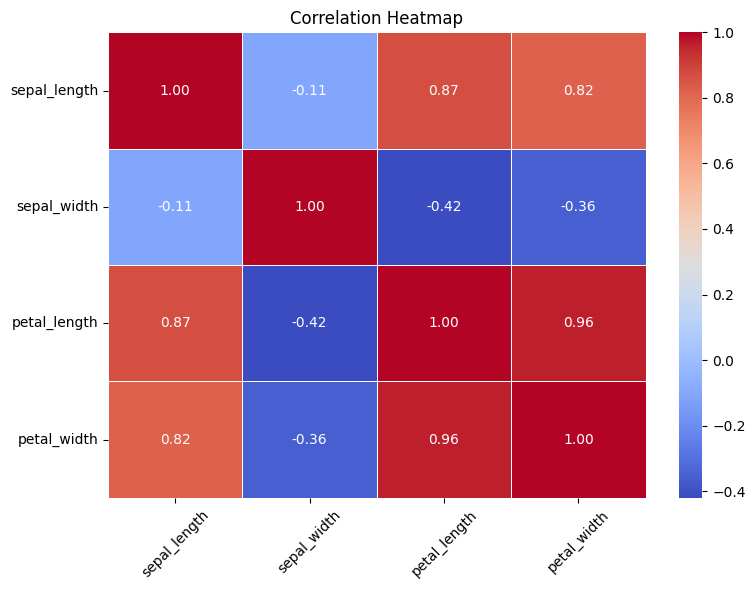

In [25]:
display(df.head())
display(df.describe())
print(f"Shape of dataframe: {df.shape}")

plot_correlation_matrix(df)

features, labels = preprocess_data(df)

Decision Tree Model:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45


Logistic Regression Model:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



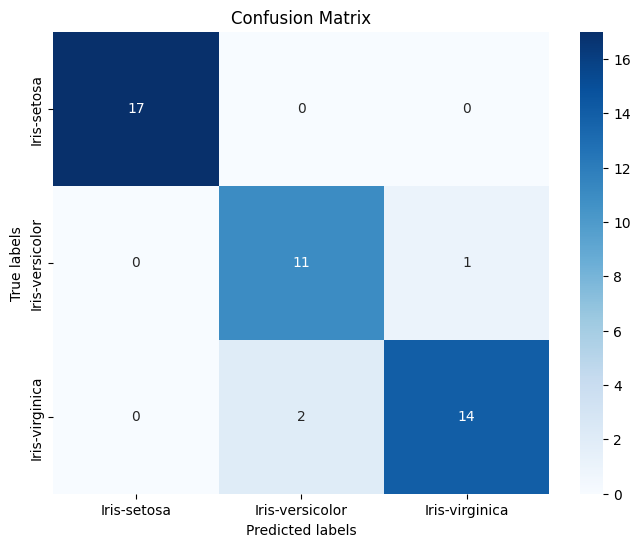

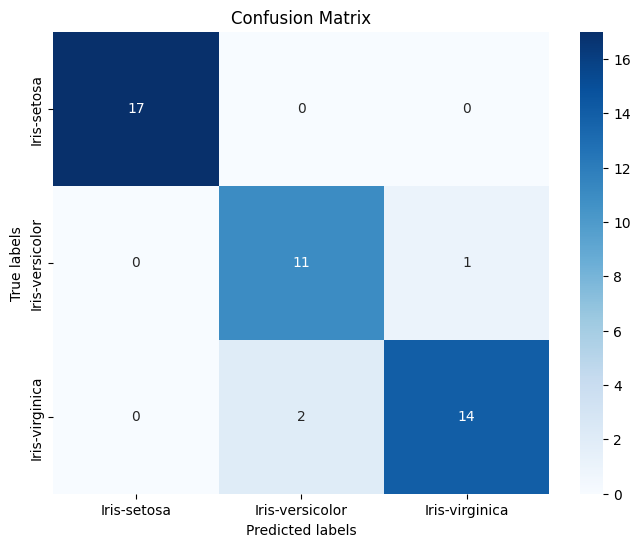

In [26]:
# Train Decision Tree model
dt_model, X_test_dt, y_test_dt = train_decision_tree_model(features, labels)

# Train Logistic Regression model
logreg_model, X_test_logreg, y_test_logreg = train_logistic_regression_model(features, labels)

# Compare models using classification report
compare_models_classification_report(dt_model, logreg_model, X_test_dt, y_test_dt, X_test_logreg, y_test_logreg)

# Use the function for Decision Tree Model
plot_confusion_matrix(dt_model, X_test_dt, y_test_dt)

# Use the function for Logistic Regression Model
plot_confusion_matrix(logreg_model, X_test_logreg, y_test_logreg)